# Preparing the Data

- Creating the Dataset
- Impute the missing values
- One-Hot encoding with category_encoder Package
- Ordinal encoding with category_encoder Package
- Scaling (StandardScaler, MinMaxScaler, RobustScaler)
- Feature Selection

In [1]:
import category_encoders as ce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating the data set

In [19]:
df = pd.DataFrame({'gender': np.random.binomial(1, 0.6, 100),
                   'height': np.random.normal(0, 10, 100),
                   'noise': np.random.normal(0, 2, 100)})
df.head(10)

,gender,height,noise
0,0,2.050353,-3.040558
1,1,-4.540895,-2.543832
2,0,8.981326,-0.262092
3,0,-3.494594,-1.995528
4,0,7.477880,4.359090
5,1,7.897804,1.146612
6,1,-6.220090,-1.088048
7,1,-2.316456,-1.329766
8,1,-2.059823,0.013841
9,1,5.134901,0.810418


In [20]:
df['height'] = df['height'] + df['gender'].apply(lambda x: 160 if x else 180)
df['weight'] = df['height'] + df['noise'] -110

In [21]:
df['height_with75nan'] = df['height'].apply(lambda x: x if np.random.binomial(1, 0.25) else np.nan)
df['height_with10nan'] = df['height'].apply(lambda x: x if np.random.binomial(1, 0.9) else np.nan)

In [22]:
df

,gender,height,noise,weight,height_with75nan,height_with10nan
0,0,182.050353,-3.040558,69.009794,NaN,182.050353
1,1,155.459105,-2.543832,42.915273,NaN,155.459105
2,0,188.981326,-0.262092,78.719235,NaN,188.981326
3,0,176.505406,-1.995528,64.509878,NaN,176.505406
4,0,187.477880,4.359090,81.836970,NaN,187.477880
...,...,...,...,...,...,...
95,1,150.223185,-2.999060,37.224125,NaN,150.223185
96,0,198.858651,0.334947,89.193599,NaN,198.858651
97,0,196.289378,0.311111,86.600489,NaN,196.289378
98,1,154.173313,-0.708624,43.464689,NaN,154.173313


In [23]:
df[['gender', 'height_with75nan', 'weight']].isna().mean()

gender              0.00
height_with75nan    0.85
weight              0.00
dtype: float64

C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_5012\4152897437.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


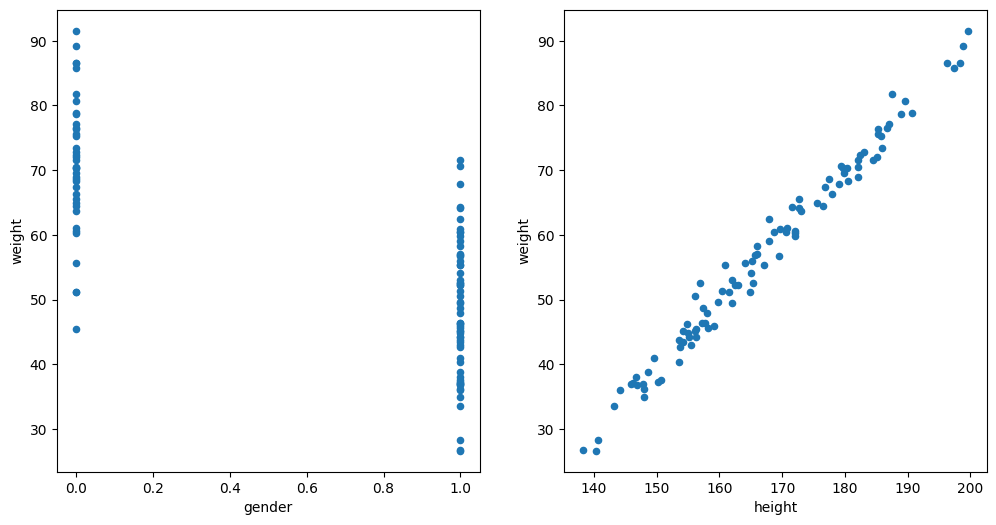

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df.plot(
    kind='scatter',
    x='gender',
    y='weight',
    ax=axs[0]
)

df.plot(
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[1]
)

fig.show()

## Simple Imputer

In [25]:
# impute values with fillna
df['height (75% zero imputed)'] = df['height_with75nan'].fillna(0)
df.describe()

,gender,height,noise,weight,height_with75nan,height_with10nan,height (75% zero imputed)
count,100.000000,100.000000,100.000000,100.000000,15.000000,90.000000,100.000000
mean,0.610000,167.330686,-0.245653,57.085033,164.818976,168.088024,24.722846
std,0.490207,15.092716,1.939262,15.304887,12.375784,15.284058,59.331439
min,0.000000,138.301832,-3.645811,26.636810,143.260725,138.301832,0.000000
25%,0.000000,155.932305,-1.720765,45.129035,156.791739,156.223585,0.000000
50%,1.000000,165.807920,-0.193971,56.323626,163.013081,166.538094,0.000000
75%,1.000000,179.758952,1.057943,69.129668,172.821698,180.394419,0.000000
max,1.000000,199.567474,5.688776,91.558194,186.656450,199.567474,186.656450


In [26]:
# This block is not from the book. for testing only
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean') # mean is 167.28
imp_val1 = imp.fit_transform(df[['height_with10nan']])[:, 0] # the [:, 0] is nessecary to change (100,1) to (100,) -> Matrix to Vector
imp_val1


array([182.05035283, 155.45910478, 188.98132642, 176.50540605,
       187.47788024, 167.89780415, 168.08802401, 157.68354442,
       157.94017746, 165.13490064, 156.09003827, 165.91864199,
       185.82230934, 168.08802401, 168.08802401, 160.38871313,
       171.60831338, 169.71228941, 177.93269903, 182.11013676,
       145.82006211, 180.44011367, 143.26072451, 168.6415984 ,
       158.22565009, 148.60253715, 170.73159301, 168.08802401,
       186.6564495 , 147.7899536 , 157.43550001, 168.08802401,
       177.38280126, 159.14828285, 185.97995061, 147.91778521,
       168.08802401, 169.41181379, 190.63244634, 164.95490056,
       154.82926937, 198.26678647, 172.11263531, 159.75306862,
       156.88615466, 182.98050551, 197.42536376, 168.08802401,
       199.56747438, 140.61984074, 146.92081927, 175.5231535 ,
       179.01113745, 164.82381757, 186.97593279, 153.58171667,
       165.70964477, 156.19602688, 184.46195604, 157.28920438,
       185.24292762, 163.01308097, 182.10655298, 156.14

In [27]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['height (10% mean imputed)'] = imp.fit_transform(df[['height_with10nan']])[:, 0] # fit_transform returns a matrix; [:, 0] turns it into a series
df['height (75% mean imputed)'] = imp.fit_transform(df[['height_with75nan']])[:, 0] # fit_transform returns a matrix; [:, 0] turns it into a series
df.describe()

,gender,height,noise,weight,height_with75nan,height_with10nan,height (75% zero imputed),height (10% mean imputed),height (75% mean imputed)
count,100.000000,100.000000,100.000000,100.000000,15.000000,90.000000,100.000000,100.000000,100.000000
mean,0.610000,167.330686,-0.245653,57.085033,164.818976,168.088024,24.722846,168.088024,164.818976
std,0.490207,15.092716,1.939262,15.304887,12.375784,15.284058,59.331439,14.491591,4.653923
min,0.000000,138.301832,-3.645811,26.636810,143.260725,138.301832,0.000000,138.301832,143.260725
25%,0.000000,155.932305,-1.720765,45.129035,156.791739,156.223585,0.000000,157.188442,164.818976
50%,1.000000,165.807920,-0.193971,56.323626,163.013081,166.538094,0.000000,168.088024,164.818976
75%,1.000000,179.758952,1.057943,69.129668,172.821698,180.394419,0.000000,179.447940,164.818976
max,1.000000,199.567474,5.688776,91.558194,186.656450,199.567474,186.656450,199.567474,186.656450


### Iterative Imputer and KNNImputer

In scikit-learn, both `IterativeImputer` and `KNNImputer` are imputation techniques used to fill in missing values in a dataset. However, they differ in their underlying approach and implementation. Here are the main differences between the two:

1. **Imputation Strategy**: 

   - `IterativeImputer`: It is a multivariate imputation technique that treats each feature with missing values as a target variable and predicts its missing values using other features in the dataset. It iteratively performs regression on the target feature using the other features as predictors until convergence is reached.

   - `KNNImputer`: It is a univariate imputation technique that imputes missing values based on the values of the k-nearest neighbors in the feature space. It finds the k nearest neighbors of each sample with missing values and takes the average (or median) of those neighbors to fill in the missing value.

2. **Handling of Non-Numeric Data**:

   - `IterativeImputer`: It can handle both numerical and categorical features by using different models for regression and classification. It uses regression models for numerical features and classification models for categorical features to impute missing values.

   - `KNNImputer`: It works only with numerical features and cannot handle categorical data directly. If you have categorical features, you need to encode them into numerical representations before using `KNNImputer`.

3. **Model Selection and Performance**:

   - `IterativeImputer`: It allows you to specify the estimator (regressor or classifier) used for imputation, such as linear regression, random forest, or support vector machines. You can choose the model that best suits your data and task. However, it can be computationally more expensive compared to `KNNImputer` due to the iterative nature of the algorithm.

   - `KNNImputer`: It does not require specifying an underlying model. Instead, it finds the k nearest neighbors based on distance metrics and imputes the missing values. It can be computationally efficient, especially for large datasets, as it does not involve iterations like `IterativeImputer`.

It is important to note that both `IterativeImputer` and `KNNImputer` have their advantages and limitations. The choice between them depends on the nature of your data, the presence of categorical features, computational considerations, and the specific problem at hand. It is recommended to experiment with both methods and evaluate their performance using appropriate evaluation metrics to determine the most suitable imputation technique for your dataset.

Iterative Imputer uses neighbouring features to get better imputed values \
We use gender here to tell the function that the height should be considered for females and males separately \
We could use more than one feature. It seems that we got the same result as we only use one feature

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(missing_values=np.nan)
df['height (75% iterative imputed)'] = imp.fit_transform(df[['height_with75nan', 'gender']])[:, 0]

In [29]:
from sklearn.impute import KNNImputer
knn_imp = IterativeImputer(missing_values=np.nan)
df['height (75% KNN imputed)'] = knn_imp.fit_transform(df[['height_with75nan', 'gender']])[:, 0]

In [30]:
from sklearn.impute import MissingIndicator

# MissingIndicator gives back a vector with boolean values that change the missing_values to True
imp = MissingIndicator(missing_values=np.nan)
df['height (is missing?)'] = imp.fit_transform(df[['height_with75nan']])[:, 0]
df[df['height (is missing?)'] == 0]['height (is missing?)'] 

# the following line would result the same
# df[~(df['height (75% zero imputed)'] == 0)]['height (is missing?)']

5     False
22    False
24    False
26    False
28    False
30    False
31    False
36    False
50    False
61    False
63    False
69    False
74    False
78    False
89    False
Name: height (is missing?), dtype: bool

In [31]:
df.describe()

,gender,height,noise,weight,height_with75nan,height_with10nan,height (75% zero imputed),height (10% mean imputed),height (75% mean imputed),height (75% iterative imputed),height (75% KNN imputed)
count,100.000000,100.000000,100.000000,100.000000,15.000000,90.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.610000,167.330686,-0.245653,57.085033,164.818976,168.088024,24.722846,168.088024,164.818976,166.738971,166.738971
std,0.490207,15.092716,1.939262,15.304887,12.375784,15.284058,59.331439,14.491591,4.653923,8.527324,8.527324
min,0.000000,138.301832,-3.645811,26.636810,143.260725,138.301832,0.000000,138.301832,143.260725,143.260725,143.260725
25%,0.000000,155.932305,-1.720765,45.129035,156.791739,156.223585,0.000000,157.188442,164.818976,160.667635,160.667635
50%,1.000000,165.807920,-0.193971,56.323626,163.013081,166.538094,0.000000,168.088024,164.818976,160.667635,160.667635
75%,1.000000,179.758952,1.057943,69.129668,172.821698,180.394419,0.000000,179.447940,164.818976,176.235162,176.235162
max,1.000000,199.567474,5.688776,91.558194,186.656450,199.567474,186.656450,199.567474,186.656450,186.656450,186.656450


Plots of the created features can be found in the PACKT book ML Hands-on

## Encoding non-numerical columns

### Data set

In [14]:
df = pd.DataFrame({'Size': np.random.choice(['XS', 'S', 'M', 'L', 'XL', 'XXL'], 10), 'Brand': np.random.choice(['Nike', 'Puma', 'Adidas', 'Le Coq', 'Reebok'], 10)})
df

,Size,Brand
0,S,Nike
1,XXL,Le Coq
2,XS,Puma
3,XXL,Nike
4,XL,Reebok
5,XS,Nike
6,XL,Adidas
7,XS,Le Coq
8,XL,Le Coq
9,XXL,Puma


### Splitting the Dataset

In [15]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.5)

In [16]:
df_train['Size'].value_counts()

XXL    2
XS     1
S      1
XL     1
Name: Size, dtype: int64

In [17]:
# read out all randomly chosen values in a list
print(type(df_train['Size'].value_counts().index))
print(type(df_train['Size'].value_counts().index.values))
print(type(df_train['Size'].value_counts().index.values.tolist()))
df_train['Size'].value_counts().index.values.tolist()

<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>
<class 'list'>


['XXL', 'XS', 'S', 'XL']

In [18]:
print(f'The train Dataset has the following Sizes: {df_train["Size"].value_counts().index.values.tolist()} while the \n'
      f'test Dataset has the following Sizes {df_test["Size"].value_counts().index.values.tolist()}')

The train Dataset has the following Sizes: ['XXL', 'XS', 'S', 'XL'] while the 
test Dataset has the following Sizes ['XS', 'XL', 'XXL']


## One-Hot Encoding

In [18]:
from category_encoders.one_hot import OneHotEncoder
encoder = OneHotEncoder(use_cat_names=True, handle_unknown='return_nan')
x_train = encoder.fit_transform(df_train)
x_test = encoder.transform(df_test)

In [19]:
df_train, df_test

(  Size   Brand
 8  XXL    Puma
 5    M    Puma
 0   XL  Reebok
 3    S    Nike
 4   XL    Nike,
   Size   Brand
 9    L    Nike
 7   XS  Adidas
 6  XXL  Reebok
 2   XS    Nike
 1    M  Reebok)

In [20]:
x_train

,Size_XXL,Size_M,Size_XL,Size_S,Brand_Puma,Brand_Reebok,Brand_Nike
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
x_test

,Size_XXL,Size_M,Size_XL,Size_S,Brand_Puma,Brand_Reebok,Brand_Nike
9,NaN,NaN,NaN,NaN,0.0,0.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,NaN,NaN,NaN,NaN,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Setting the unknown values to zero

In [22]:
encoder = ce.one_hot.OneHotEncoder(use_cat_names=True, handle_unknown='value')
x_train = encoder.fit_transform(df_train)
x_test = encoder.transform(df_test)

In [23]:
x_test

,Size_XXL,Size_M,Size_XL,Size_S,Brand_Puma,Brand_Reebok,Brand_Nike
9,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0


## Ordinal Encoder

In [24]:
# first create a new df that only consists of the Size
df_size = df['Size'].copy()
df_size_train, df_size_test = train_test_split(df_size, test_size=0.5)

In [25]:
from category_encoders import OrdinalEncoder

oencoder = OrdinalEncoder(mapping=[{'col': 'Size', 'mapping':{'XS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5}}])

df_train.loc[:, 'Size [Ordinal Encoded]'] = oencoder.fit_transform(df_train['Size'])['Size'].values
df_test.loc[:, 'Size [Ordinal Encoded]'] = oencoder.transform(df_test['Size'])['Size'].values

In [26]:
df_test, df_train

(  Size   Brand  Size [Ordinal Encoded]
 9    L    Nike                     4.0
 7   XS  Adidas                     1.0
 6  XXL  Reebok                    -1.0
 2   XS    Nike                     1.0
 1    M  Reebok                     3.0,
   Size   Brand  Size [Ordinal Encoded]
 8  XXL    Puma                    -1.0
 5    M    Puma                     3.0
 0   XL  Reebok                     5.0
 3    S    Nike                     2.0
 4   XL    Nike                     5.0)

## Scaling

In [27]:
from sklearn import datasets

wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = pd.Series(wine.target)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [28]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.4, random_state=22)

x_train = df_train[wine.feature_names]
x_test  = df_test[wine.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform (x_test)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Powertransformation (Logtransformation)

Sometimes a logtransformation is needed. This is done with the PowerTransformer \
This is a simple example that is not related to the above code

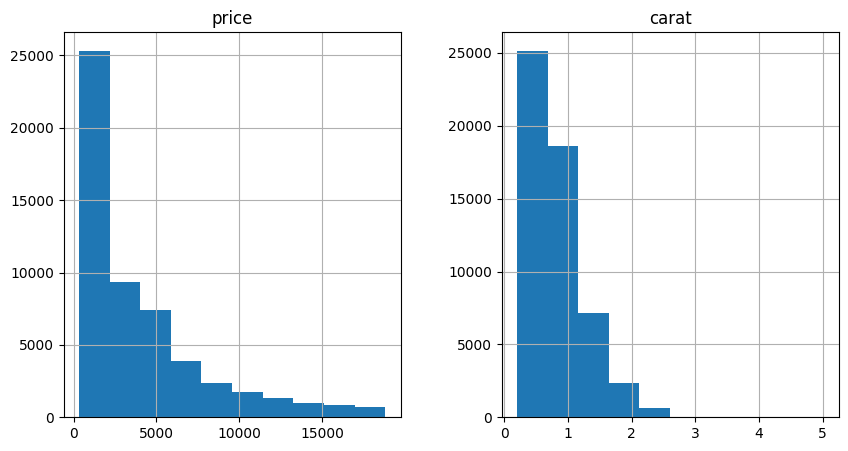

In [66]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
diamonds[["price", "carat"]].hist(figsize=(10, 5));

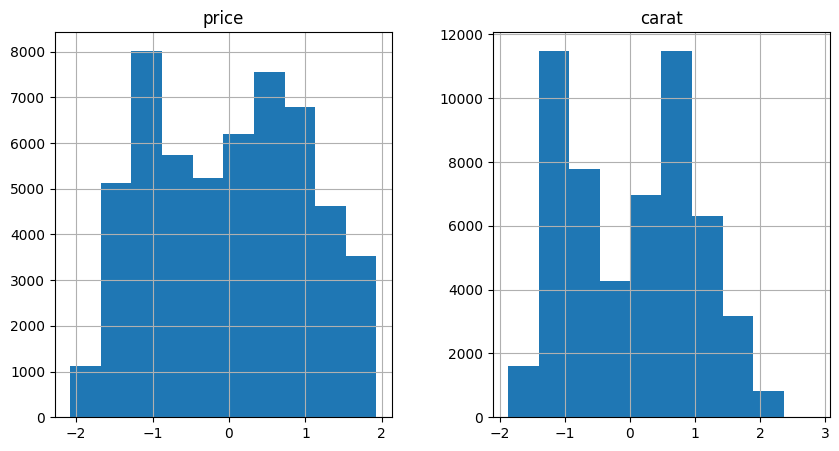

In [67]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
diamonds.loc[:, ["price", "carat"]] = pt.fit_transform(diamonds[["price", "carat"]])

diamonds[["price", "carat"]].hist(figsize=(10, 5));

## Feature Selection

### Creating the Dataset

In [32]:
from sklearn import datasets

wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = pd.Series(wine.target)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.4, random_state=22)

x_train = df_train[wine.feature_names]
x_test  = df_test[wine.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

## Variance Threshold

In [34]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)
vt.fit(x_train)

VarianceThreshold(threshold=0)

In [35]:
pd.DataFrame({'Feature': wine.feature_names, 'Variance': vt.variances_}).sort_values('Variance', ascending=True)

,Feature,Variance
7,nonflavanoid_phenols,0.013845
10,hue,0.055709
2,ash,0.068327
8,proanthocyanins,0.306081
5,total_phenols,0.369353
11,od280/od315_of_diluted_wines,0.478116
0,alcohol,0.679757
6,flavanoids,0.925865
1,malic_acid,0.987016
9,color_intensity,5.612742


In [36]:
vt = VarianceThreshold(threshold=5)
vt.fit(x_train)
# PACKT don't uses transform as there is another function .get_support() which gives back a vector with True False which can be used for masking
# x_train_new, x_test_new = vt.transform(x_train), vt.transform(x_test)

VarianceThreshold(threshold=5)

In [37]:
# x_train_new = x_train.iloc[:, vt.get_support()]
# Next line give back the x_train with a higher vt value than 5
x_train.iloc[:, vt.get_support()]

,alcalinity_of_ash,magnesium,color_intensity,proline
131,20.0,104.0,5.40,530.0
16,20.0,120.0,6.20,1280.0
106,19.0,80.0,3.40,510.0
64,19.0,104.0,2.95,355.0
68,17.0,110.0,3.17,750.0
...,...,...,...,...
102,21.0,98.0,2.80,438.0
100,17.5,97.0,3.30,710.0
44,17.0,107.0,5.04,885.0
132,24.0,98.0,5.70,560.0


The issue here is that the features weren't scaled and the biggest numbers created the highest variance. We first have to scale
the features that all features are equally important. We can't use the StandardScaler as it changes the values to N(0,1). We
don't want a standard deviation of 1. Therefore we take the MinMaxScaler

In [38]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

vt = VarianceThreshold(threshold=0)
vt.fit(x_train_scaled)

VarianceThreshold(threshold=0)

In [39]:
pd.DataFrame({'Feature': wine.feature_names, 'Variance': vt.variances_}).sort_values('Variance', ascending=True)

,Feature,Variance
4,magnesium,0.027419
2,ash,0.029189
3,alcalinity_of_ash,0.032743
10,hue,0.036823
8,proanthocyanins,0.037160
6,flavanoids,0.041209
5,total_phenols,0.043918
9,color_intensity,0.044269
0,alcohol,0.047075
1,malic_acid,0.049843


In [40]:
# Coefficient of variation

df_variances = x_train.apply([np.mean, np.var, np.std]).T
df_variances

,mean,var,std
alcohol,12.975283,0.686231,0.828391
malic_acid,2.143868,0.996416,0.998207
ash,2.357642,0.068978,0.262637
alcalinity_of_ash,19.478302,8.999049,2.999841
magnesium,99.915094,234.287960,15.306468
total_phenols,2.284151,0.372870,0.610631
flavanoids,2.046792,0.934683,0.966790
nonflavanoid_phenols,0.361038,0.013977,0.118224
proanthocyanins,1.580755,0.308996,0.555874
color_intensity,4.982547,5.666196,2.380377


In [41]:
df_variances['cv'] = df_variances['std'] / df_variances['mean']

df_variances[['var', 'cv']].sort_values('cv', ascending=True)

,var,cv
alcohol,0.686231,0.063844
ash,0.068978,0.111398
magnesium,234.287960,0.153195
alcalinity_of_ash,8.999049,0.154009
hue,0.056240,0.242091
od280/od315_of_diluted_wines,0.482670,0.264152
total_phenols,0.372870,0.267334
nonflavanoid_phenols,0.013977,0.327457
proanthocyanins,0.308996,0.351651
proline,106662.478347,0.440263


## Filters

In [42]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

f, p = f_classif(x_train_scaled, y_train)

In [43]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(x_train, y_train)

In [44]:
pd.DataFrame({'Feature': wine.feature_names, 'F': f, 'MI': mi}).sort_values('MI', ascending=False).style.bar(subset=['F', 'MI'], color='grey')

,Feature,F,MI
6,flavanoids,119.566249,0.688716
9,color_intensity,74.081398,0.616776
12,proline,133.289086,0.522255
11,od280/od315_of_diluted_wines,90.659327,0.507654
10,hue,66.737689,0.471520
0,alcohol,82.628850,0.460702
5,total_phenols,54.651858,0.407343
1,malic_acid,23.086345,0.346787
3,alcalinity_of_ash,25.803853,0.275812
4,magnesium,7.651958,0.246379


## Multiple Features at a time / Embedded

### Select from Model

ash and magnesium would have been excluded in the examples above. When multiple features are tested
and how they interreact, the decision tree classifier says that those features are important

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
selector = SelectFromModel(estimator=estimator, threshold=-np.inf, max_features=8)
selector.fit(x_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), max_features=8,
                threshold=-inf)

In [46]:
x_train.iloc[:, selector.get_support()]

,alcohol,malic_acid,ash,alcalinity_of_ash,color_intensity,hue,od280/od315_of_diluted_wines,proline
131,12.88,2.99,2.40,20.0,5.40,0.74,1.42,530.0
16,14.30,1.92,2.72,20.0,6.20,1.07,2.65,1280.0
106,12.25,1.73,2.12,19.0,3.40,1.00,3.17,510.0
64,12.17,1.45,2.53,19.0,2.95,1.45,2.23,355.0
68,13.34,0.94,2.36,17.0,3.17,1.02,1.93,750.0
...,...,...,...,...,...,...,...,...
102,12.34,2.45,2.46,21.0,2.80,0.80,3.38,438.0
100,12.08,2.08,1.70,17.5,3.30,1.27,2.96,710.0
44,13.05,1.77,2.10,17.0,5.04,0.88,3.35,885.0
132,12.81,2.31,2.40,24.0,5.70,0.66,1.36,560.0


### Recursive Feature Elimination (RFE)

First a simple example from \
https://pub.towardsai.net/19-most-elegant-sklearn-tricks-i-found-after-3-years-of-use-5bda439fa506

In [58]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge

# Build a synthetic dataset
X, y = make_regression(n_samples=10000, n_features=15, n_informative=10)

# Init/fit the selector
rfecv = RFECV(estimator=Ridge(), cv=5)
rfecv.fit(X, y)

# Transform the feature array
rfecv.transform(X).shape

(10000, 10)

Wine Example

In [59]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge

# Init/fit the selector
rfecv = RFECV(estimator=DecisionTreeClassifier(), cv=5)
rfecv.fit(x_train, y_train)

RFECV(cv=5, estimator=DecisionTreeClassifier())

In [60]:
# Transform the feature array
print(x_train.shape)
rfecv.transform(x_train).shape

(106, 13)


(106, 8)

In [61]:
x_train.iloc[:, rfecv.get_support()]

,ash,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
131,2.40,1.30,1.22,0.83,5.40,0.74,1.42,530.0
16,2.72,2.80,3.14,1.97,6.20,1.07,2.65,1280.0
106,2.12,1.65,2.03,1.63,3.40,1.00,3.17,510.0
64,2.53,1.89,1.75,1.03,2.95,1.45,2.23,355.0
68,2.36,2.53,1.30,0.42,3.17,1.02,1.93,750.0
...,...,...,...,...,...,...,...,...
102,2.46,2.56,2.11,1.31,2.80,0.80,3.38,438.0
100,1.70,2.23,2.17,1.40,3.30,1.27,2.96,710.0
44,2.10,3.00,3.00,2.03,5.04,0.88,3.35,885.0
132,2.40,1.15,1.09,0.83,5.70,0.66,1.36,560.0


In [62]:
rfecv.feature_names_in_

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

### Sequential Feature Selector

In [63]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(estimator=DecisionTreeClassifier(), cv=5)
sfs.fit(x_train, y_train)

c:\Users\Martin Biber\Dropbox\pythonvenv\DataScience\Lib\site-packages\sklearn\feature_selection\_sequential.py:206: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


SequentialFeatureSelector(estimator=DecisionTreeClassifier())

In [64]:
# Transform the feature array
print(x_train.shape)
sfs.transform(x_train).shape

(106, 13)


(106, 6)

In [65]:
sfs.feature_names_in_

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)